In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
veri=pd.read_excel("https://www.dropbox.com/s/luoopt5biecb04g/SATILIK_EV1.xlsx?dl=1")
veri.head()

,Unnamed: 0,Fiyat,Oda_Sayısı,Net_m2,Katı,Yaşı
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  191 non-null    int64
 1   Fiyat       191 non-null    int64
 2   Oda_Sayısı  191 non-null    int64
 3   Net_m2      191 non-null    int64
 4   Katı        191 non-null    int64
 5   Yaşı        191 non-null    int64
dtypes: int64(6)
memory usage: 9.1 KB


In [4]:
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,191.0,95.000000,55.281100,0.0,47.5,95.0,142.5,190.0
Fiyat,191.0,649.476440,111.064174,450.0,575.0,650.0,700.0,1175.0
Oda_Sayısı,191.0,2.340314,0.721401,1.0,2.0,2.0,3.0,3.0
Net_m2,191.0,85.183246,16.482620,40.0,80.0,90.0,95.0,125.0
Katı,191.0,3.931937,3.752974,0.0,0.0,3.0,7.0,11.0
Yaşı,191.0,12.753927,8.374596,0.0,4.0,16.0,20.0,24.0


In [5]:
veri.isnull().sum()

Unnamed: 0    0
Fiyat         0
Oda_Sayısı    0
Net_m2        0
Katı          0
Yaşı          0
dtype: int64

<AxesSubplot:>

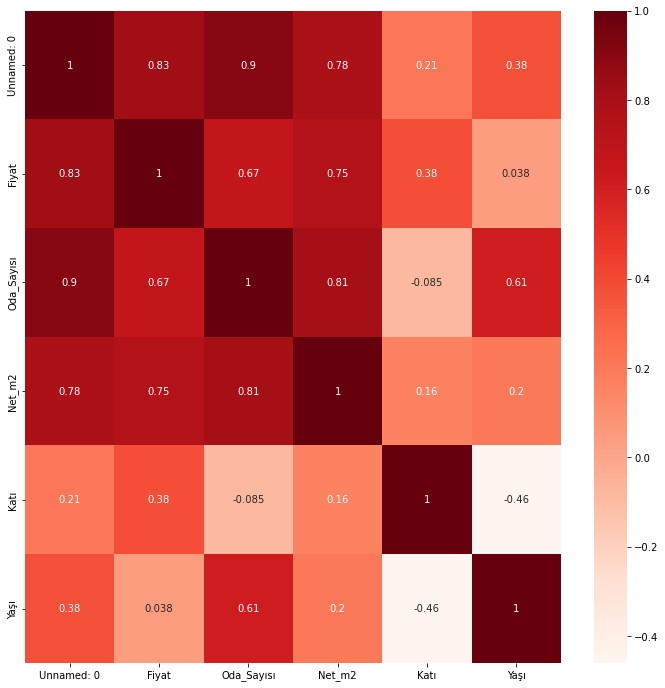

In [6]:
plt.figure(figsize=(12,12))
cor=veri.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fiyat', ylabel='Density'>

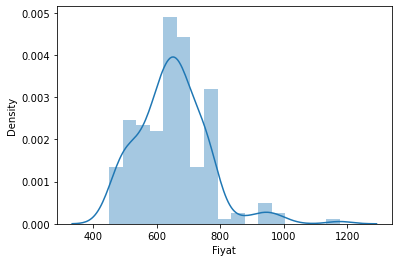

In [7]:
sns.distplot(veri['Fiyat'])

In [8]:
x=veri[['Oda_Sayısı','Net_m2','Katı','Yaşı']]
y=veri['Fiyat']
x_egitim,x_test,y_egitim,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(x_egitim,y_egitim)

LinearRegression()

In [9]:
print("MODEL ICIN SABIT DEGER: ",model_lr.intercept_)
print()
print(model_lr.coef_)

MODEL ICIN SABIT DEGER:  317.95778195650087

[125.40233478   0.86598291   7.61699499  -5.12676156]


In [10]:
degerler=pd.DataFrame(model_lr.coef_,x.columns)
print(degerler)

                     0
Oda_Sayısı  125.402335
Net_m2        0.865983
Katı          7.616995
Yaşı         -5.126762


In [11]:
tahmin_test=model_lr.predict(x_test)
for i,tahmin in enumerate(tahmin_test):
    print("\nGERCEKK FIYAT: %.2f\tTAHMIN EDILEN FIYAT: %.2f"%(tahmin,y[i]))


GERCEKK FIYAT: 707.15	TAHMIN EDILEN FIYAT: 475.00

GERCEKK FIYAT: 661.79	TAHMIN EDILEN FIYAT: 475.00

GERCEKK FIYAT: 682.17	TAHMIN EDILEN FIYAT: 450.00

GERCEKK FIYAT: 727.20	TAHMIN EDILEN FIYAT: 450.00

GERCEKK FIYAT: 694.40	TAHMIN EDILEN FIYAT: 475.00

GERCEKK FIYAT: 681.35	TAHMIN EDILEN FIYAT: 475.00

GERCEKK FIYAT: 493.33	TAHMIN EDILEN FIYAT: 475.00

GERCEKK FIYAT: 686.64	TAHMIN EDILEN FIYAT: 475.00

GERCEKK FIYAT: 778.99	TAHMIN EDILEN FIYAT: 450.00

GERCEKK FIYAT: 450.77	TAHMIN EDILEN FIYAT: 475.00

GERCEKK FIYAT: 460.23	TAHMIN EDILEN FIYAT: 475.00

GERCEKK FIYAT: 707.15	TAHMIN EDILEN FIYAT: 525.00

GERCEKK FIYAT: 683.86	TAHMIN EDILEN FIYAT: 550.00

GERCEKK FIYAT: 732.49	TAHMIN EDILEN FIYAT: 575.00

GERCEKK FIYAT: 658.52	TAHMIN EDILEN FIYAT: 550.00

GERCEKK FIYAT: 710.29	TAHMIN EDILEN FIYAT: 575.00

GERCEKK FIYAT: 558.50	TAHMIN EDILEN FIYAT: 500.00

GERCEKK FIYAT: 696.59	TAHMIN EDILEN FIYAT: 550.00

GERCEKK FIYAT: 695.20	TAHMIN EDILEN FIYAT: 525.00

GERCEKK FIYAT: 673.90	TAHMIN E

In [12]:
from sklearn.metrics import*
print("MEAN SQUARED ERROR: %.2f"%r2_score(y_test,tahmin_test))

MEAN SQUARED ERROR: 0.72


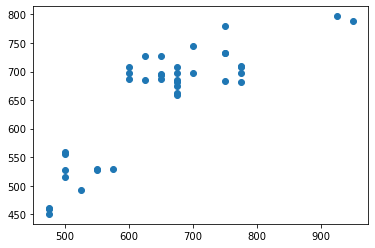

In [13]:
plt.scatter(y_test,tahmin_test)

In [ ]:
while True:
    liste=[]
    Oda_sayisi=float(input("\nODA SAYISI GIRINIZ: "))
    Net_m2=float(input("\nMETRE KAREYI GIRINIZ: "))
    Kat=float(input("\nBULUNDUGU KATI GIRINIZ: "))
    Yasi=float(input("\nBINA YASINI GIRINIZ: "))
    liste.append(Oda_sayisi)
    liste.append(Net_m2)
    liste.append(Kat)
    liste.append(Yasi)
    basla=np.array([liste])
    tahmin_veri=model_lr.predict(basla)
    print("\nTAHMINI FIYAT: %.2f"%tahmin_veri)
    cevap=str(input("\nISLEM DEVAM ETSIN MI: ")).upper()
    if(cevap=='E'):
        continue
    else:
        break